# Task 2.1 (Canada Per Capita) From Scratch
The Dataset from kaggle (https://www.kaggle.com/datasets/gurdit559/canada-per-capita-income-single-variable-data-set?resource=download&select=canada_per_capita_income.csv)

## Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## Load Data

In [5]:
df = pd.read_csv('canada_per_capita_income.csv')
df

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


## Data Exploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [8]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


## Data Visualization 

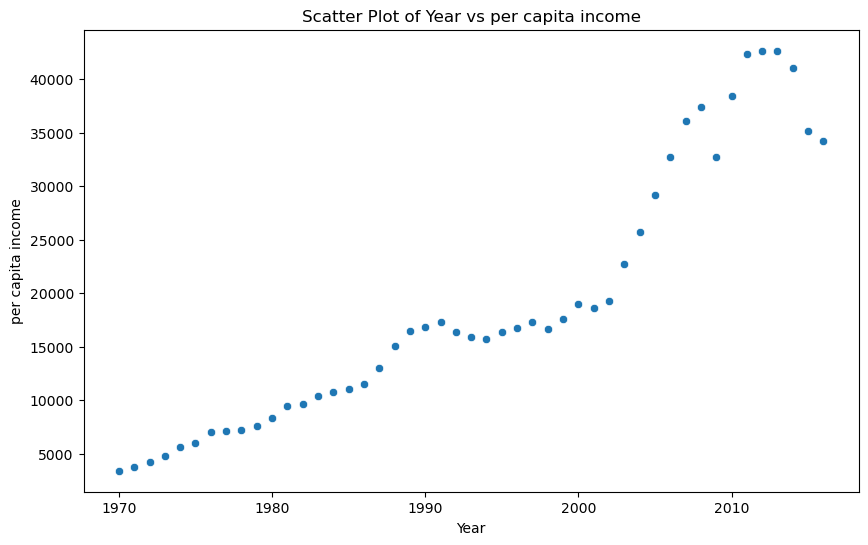

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='per capita income (US$)')
plt.title('Scatter Plot of Year vs per capita income')
plt.xlabel('Year')
plt.ylabel('per capita income')
plt.show()

# Linear Regression From Scratch

### --> Define Features and Target

In [13]:
X = df['year'].values  # Input (independent variable)
y = df['per capita income (US$)'].values  # Output (dependent variable)

### --> Initialize the parameters of the linear equation (y = mx + b), Where (m is slope) and (b is intersept)

In [15]:
#w = 0  # Initial weight (slope)
#b = 0  # Initial bias (intercept)
#learning_rate =  0.000001  # Step size for gradient descent
#n = len(X)  # Number of data points (samples)

### --> Define the model hyposis (Applying the linear equation)

In [17]:
def predict(X, w, b):
    return w * X + b

### --> Calculate the mean square error which is {(1/n) * sum((predected values - actual values) ** 2)}

In [19]:
def compute_cost(X, y, w, b):
    n = len(X)
    y_pred = predict(X, w, b)
    cost = (1/n) * np.sum((y_pred - y) ** 2)
    return cost

### --> Apply Gradient Decent (To update the m and b) and least square to reach minimum cost function (minimum error)

In [21]:
def gradient_descent(X, y, w, b, learning_rate, epochs):
    cost_history = []
    n = len(X)
    for i in range(epochs):
        y_pred = predict(X, w, b)

        dw = -(2/n) * np.sum(X * (y - y_pred)) 
        db = -(2/n) * np.sum(y - y_pred)

        w = w - learning_rate * dw 
        b = b - learning_rate * db 

        cost = compute_cost(X, y, w, b)
        if np.isinf(cost) or np.isnan(cost):
            print(f"Terminating early at epoch {i} due to cost overflow.")
            break
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Epoch {i}: Cost {cost}")

    return w, b, cost_history

In [22]:
x_mean = np.mean(X)
y_mean = np.mean(y)

n = len(X)

numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2

# b1= (y-y1)/(x-x1)
# b0= y-(b1*x)
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

#printing the coefficient
print(b1, b0)

828.4650752227104 -1632210.7578554575


### --> Train the model

In [24]:
w = np.random.rand(1)
b = np.random.rand()
learning_rate = 1e-10  # Set an appropriate learning rate
epochs = 1000
w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, epochs)

print(f"Final weight (w): {w}")
print(f"Final bias (b): {b}")

Epoch 0: Cost 432946729.91402286
Epoch 100: Cost 389728099.07576156
Epoch 200: Cost 352861013.48164576
Epoch 300: Cost 321412030.1649233
Epoch 400: Cost 294584887.85852027
Epoch 500: Cost 271700346.34313655
Epoch 600: Cost 252178988.66783684
Epoch 700: Cost 235526550.8101277
Epoch 800: Cost 221321407.33510017
Epoch 900: Cost 209203896.20127025
Final weight (w): [5.64123949]
Final bias (b): 0.9022061966532663


In [25]:
w = 828.46507522
b = -1632210.75785546
learning_rate = 1e-10  # Set an appropriate learning rate
epochs = 1000
print(f"Final weight (w): {w}")
print(f"Final bias (b): {b}")

Final weight (w): 828.46507522
Final bias (b): -1632210.75785546


### --> Predict

In [27]:
y_pred = predict(X, w, b)
print("Predicted values:", y_pred)

Predicted values: [ -134.55967206   693.90540316  1522.37047838  2350.8355536
  3179.30062882  4007.76570404  4836.23077926  5664.69585448
  6493.1609297   7321.62600492  8150.09108014  8978.55615536
  9807.02123058 10635.4863058  11463.95138102 12292.41645624
 13120.88153146 13949.34660668 14777.8116819  15606.27675712
 16434.74183234 17263.20690756 18091.67198278 18920.137058
 19748.60213322 20577.06720844 21405.53228366 22233.99735888
 23062.4624341  23890.92750932 24719.39258454 25547.85765976
 26376.32273498 27204.7878102  28033.25288542 28861.71796064
 29690.18303586 30518.64811108 31347.1131863  32175.57826152
 33004.04333674 33832.50841196 34660.97348718 35489.4385624
 36317.90363762 37146.36871284 37974.83378806]


### --> Visualize the Linear Regression

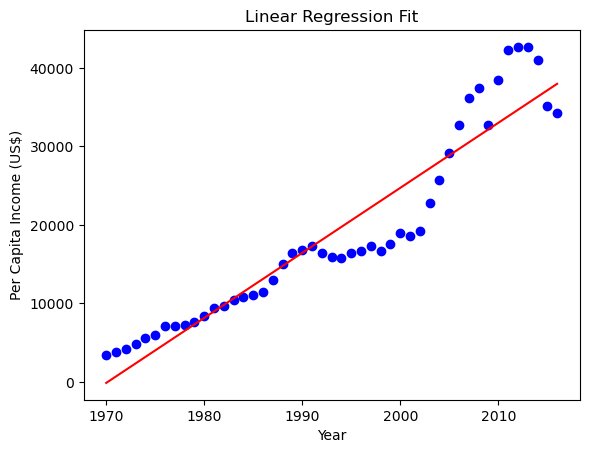

In [29]:
# Plot the regression line
plt.scatter(X, y, color='blue')  # Original data points
plt.plot(X, predict(X, w, b), color='red')  # Fitted line
plt.title("Linear Regression Fit")
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.show()

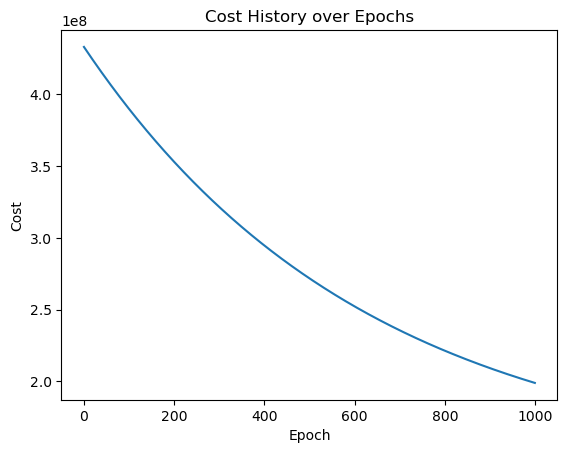

In [30]:
# Plot cost history
plt.plot(range(len(cost_history)), cost_history)
plt.title("Cost History over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.show()

### --> Use the model 

In [32]:
PerCapitaIncome = predict(2020 , 5.66785398 , 0.47853383775459246)
PerCapitaIncome

11449.543573437755